MM_12_Clustering_E_Solution

Laden der Imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin




/home/max/Programme/miniconda3/envs/MM_12/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Laden der Daten:

In [2]:
plt.rcParams['figure.figsize'] = (16,9)
data = pd.read_csv("edlich-kmeans-A0.csv")
print(data.head())



         V1        V2        V3
0 -5.340236  4.747246  3.823326
1 -9.587065 -3.434466  9.701839
2 -8.385012 -3.902794  8.514620
3  5.708226  2.658575  5.404482
4 -7.431665 -4.390251  9.003216


Plotten des Datensatzes

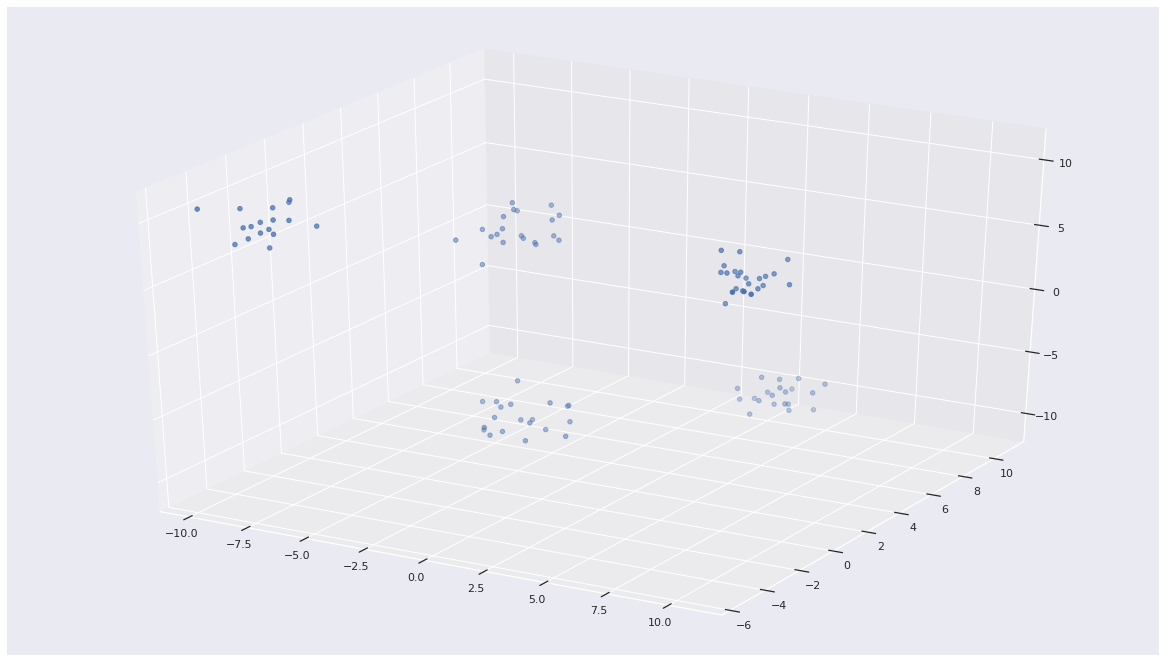

In [3]:
v1 = data.V1.values
v2 = data.V2.values
v3 = data.V3.values


fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(v1,v2,v3);

In [4]:
X = data.values
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_


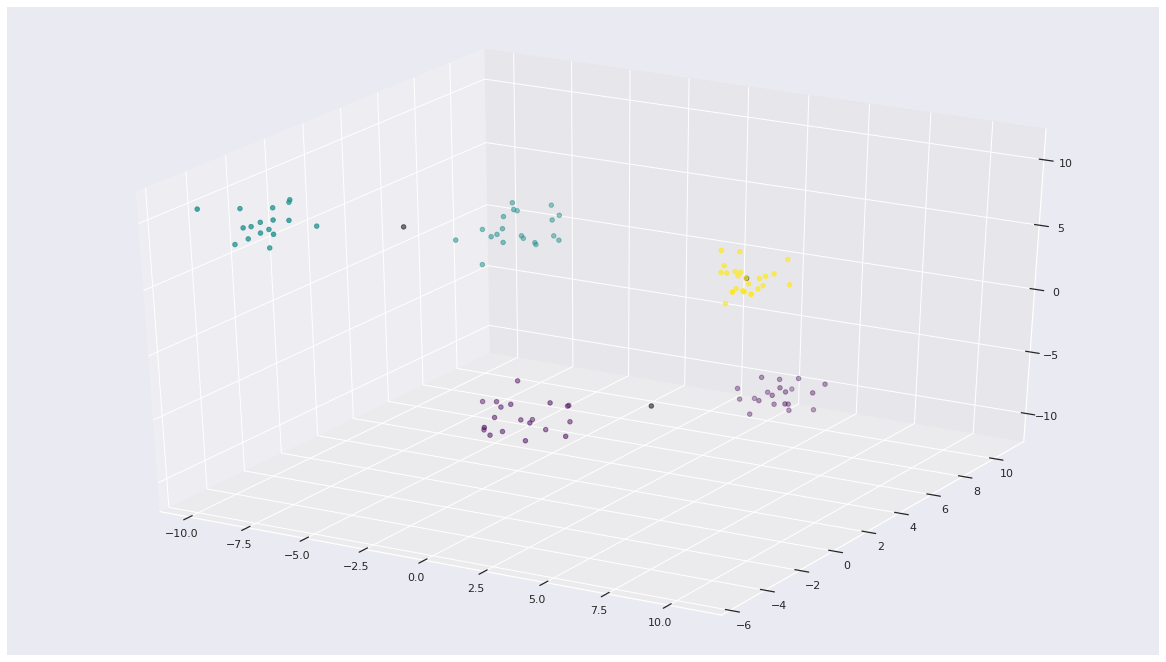

In [5]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(v1,v2,v3,c=y_kmeans,cmap='viridis');



ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', alpha=0.5);

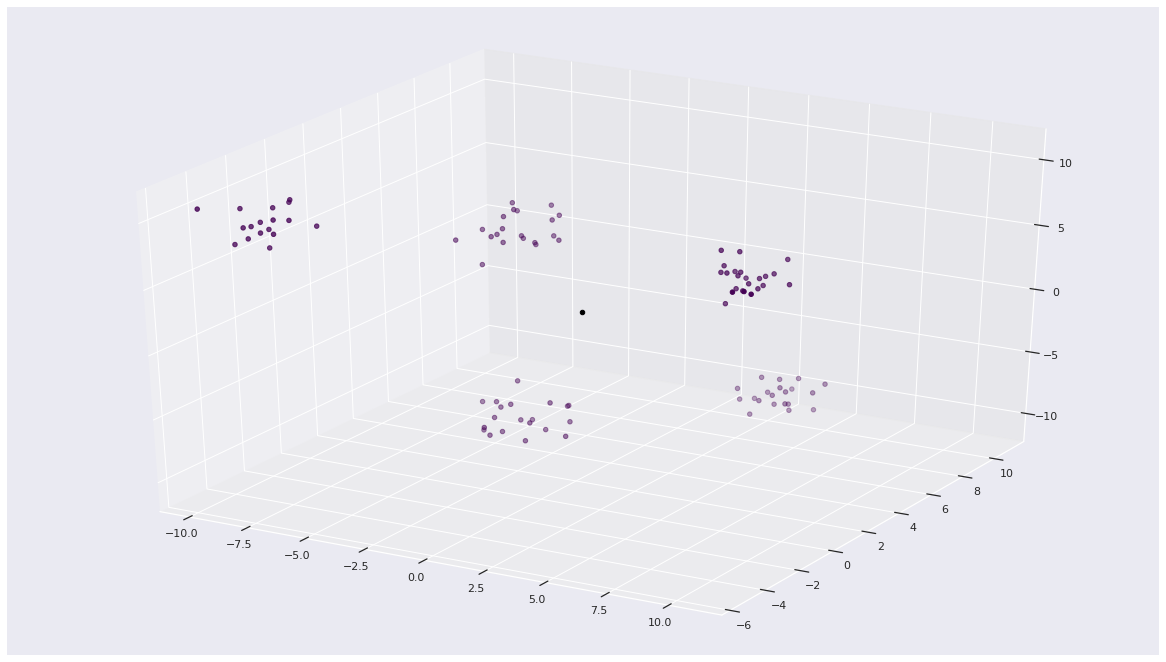

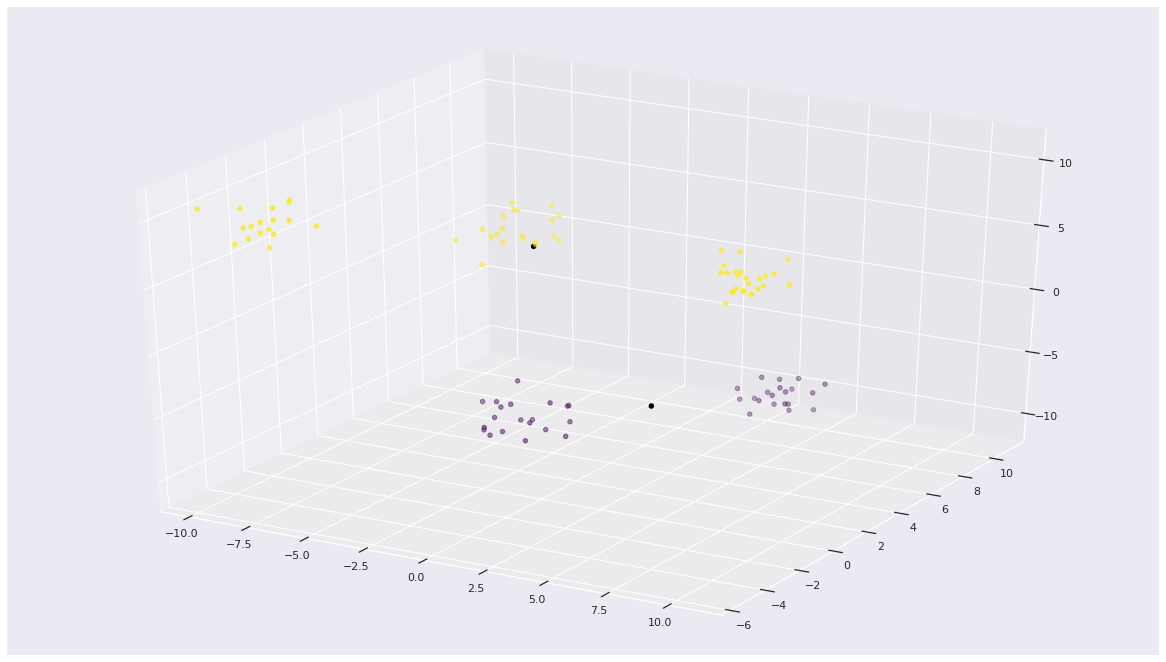

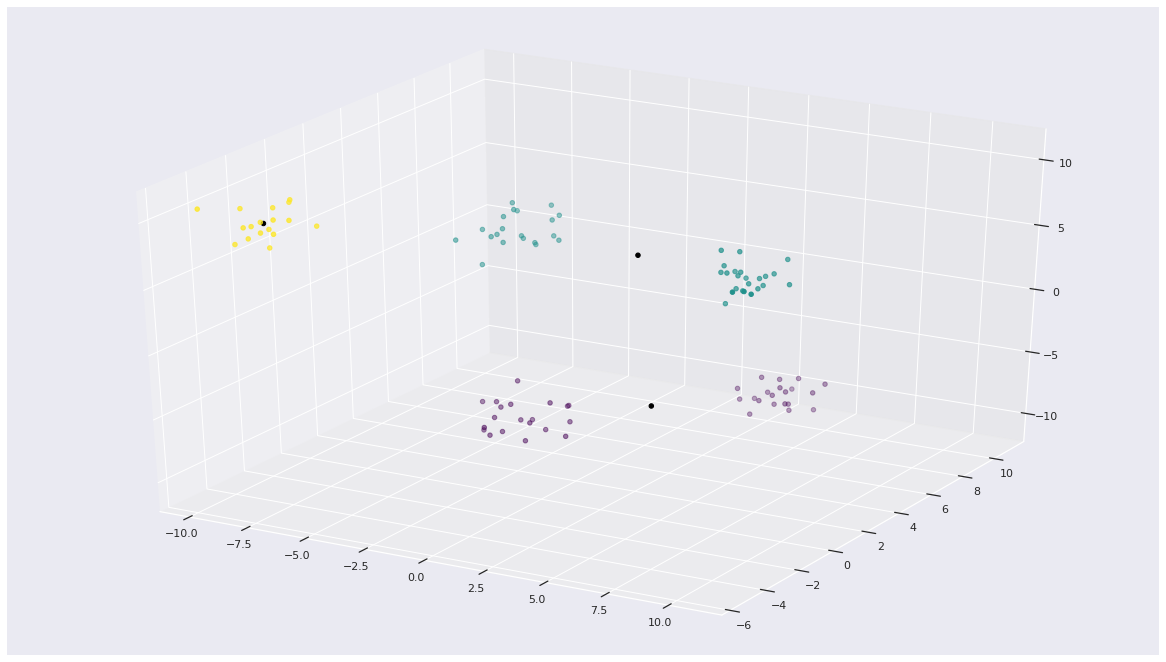

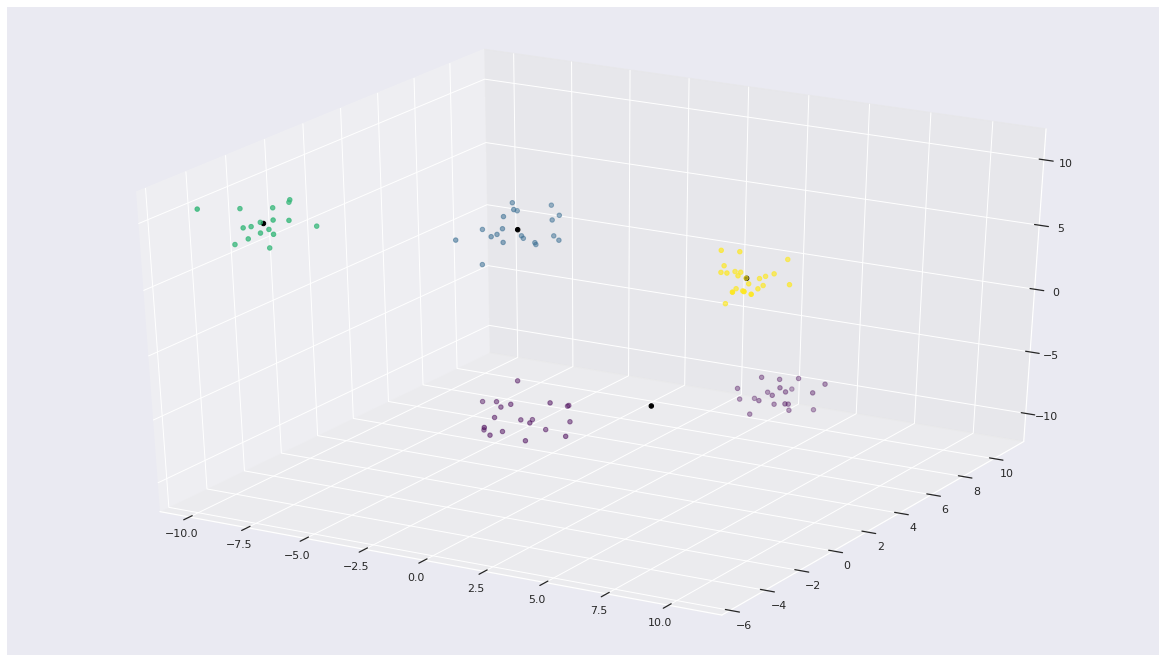

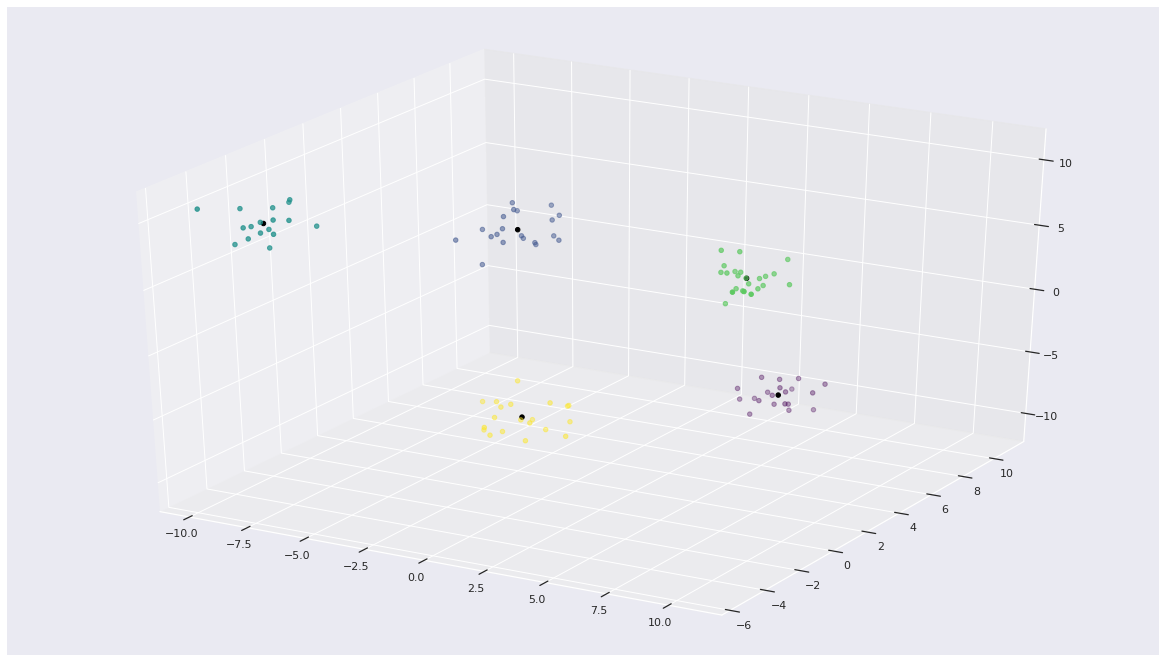

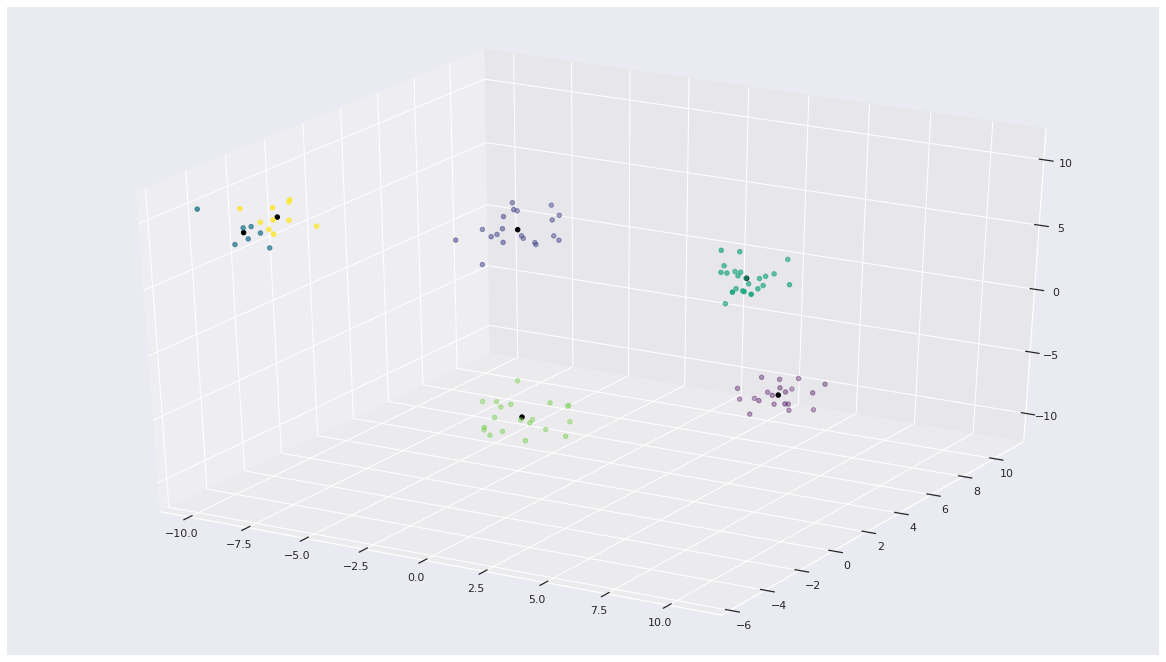

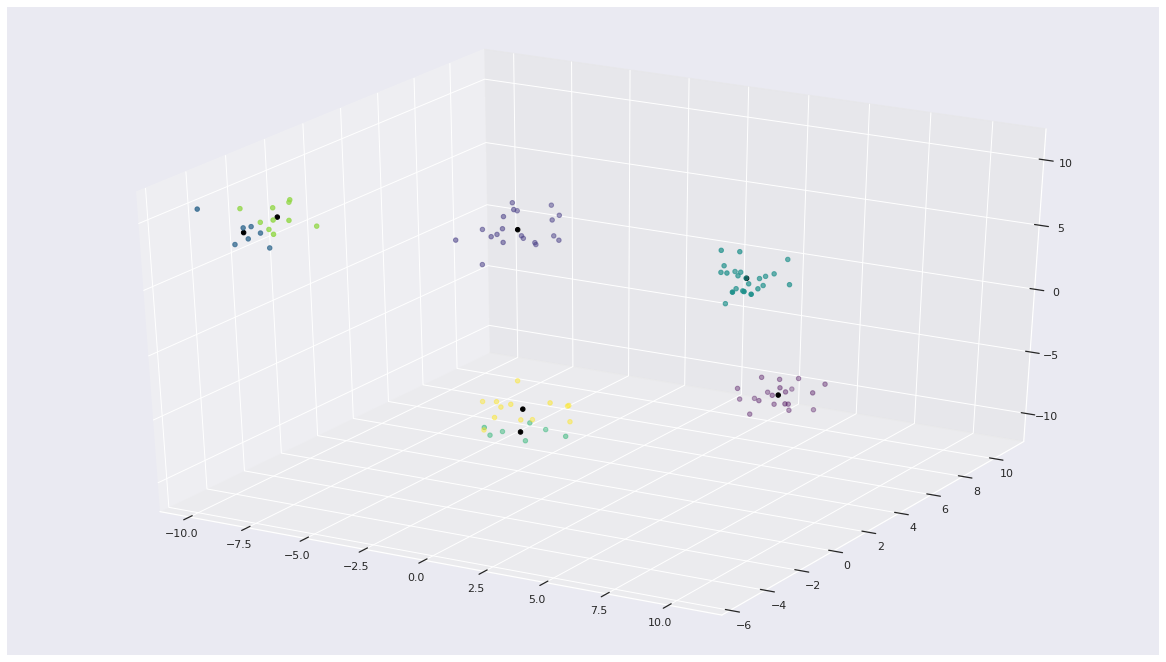

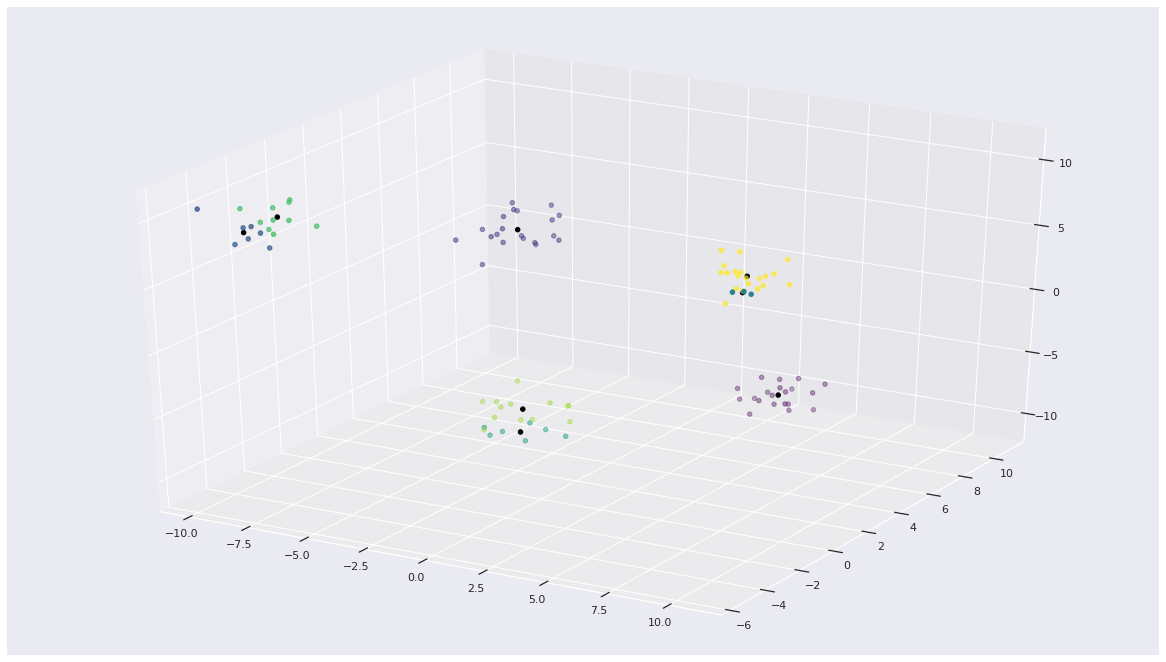

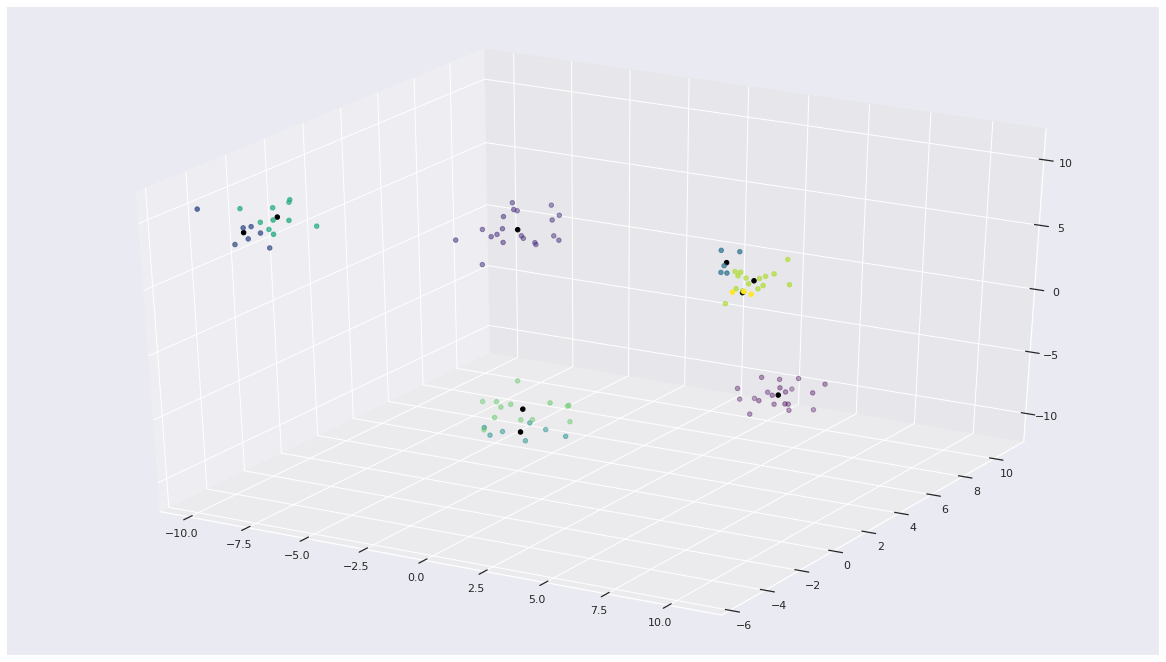

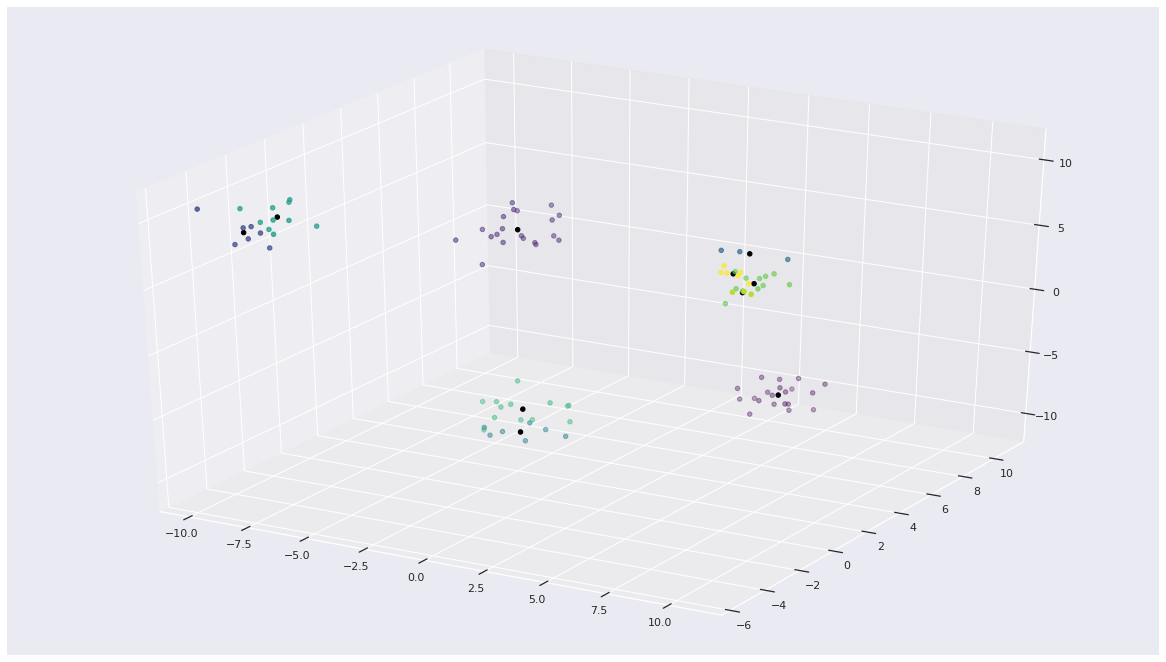

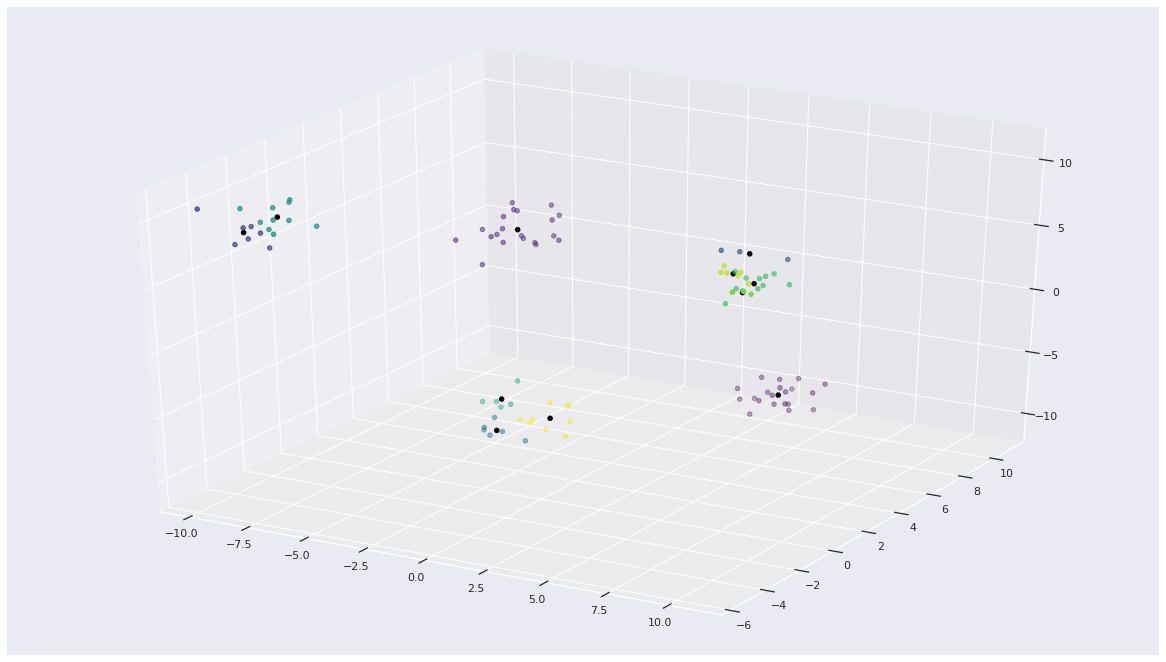

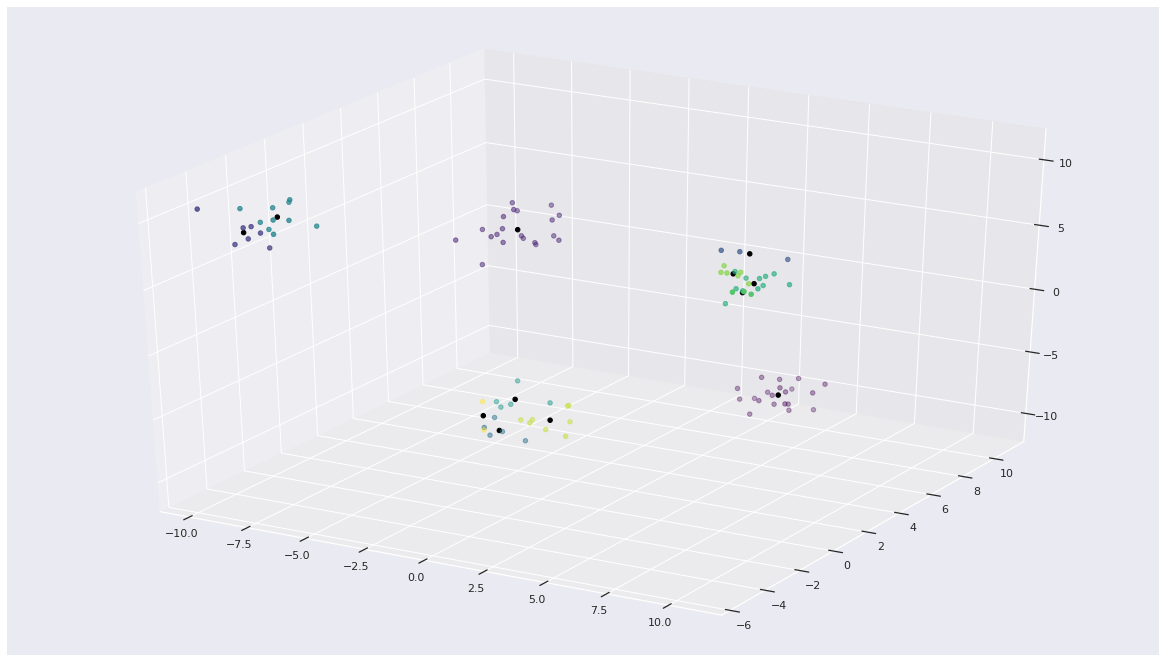

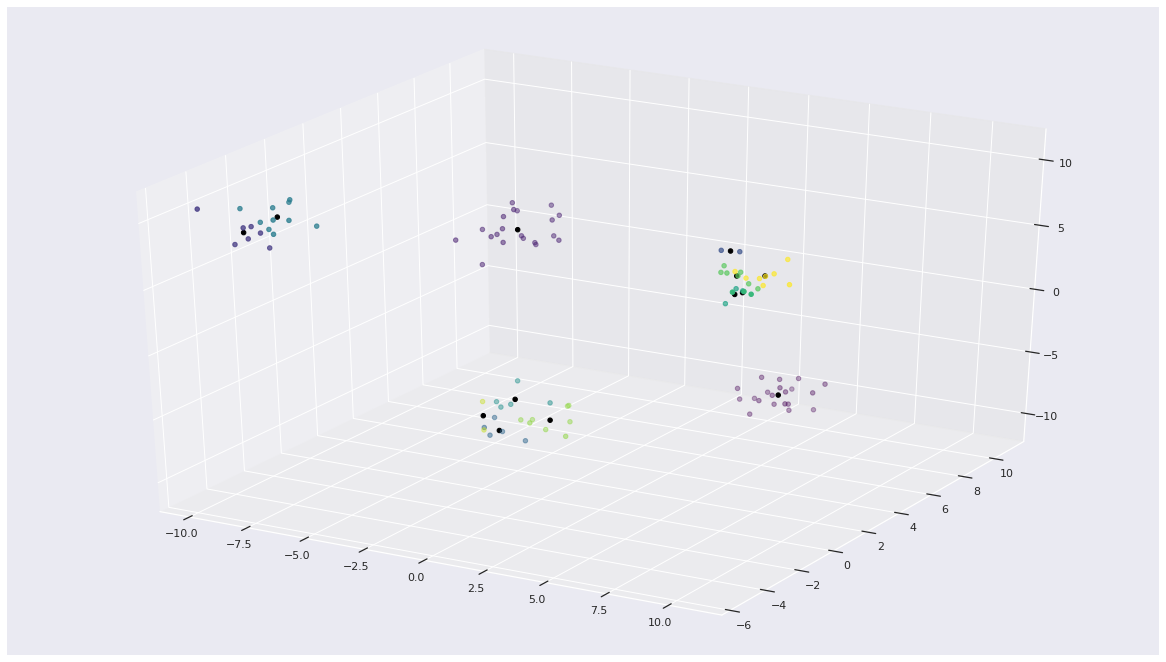

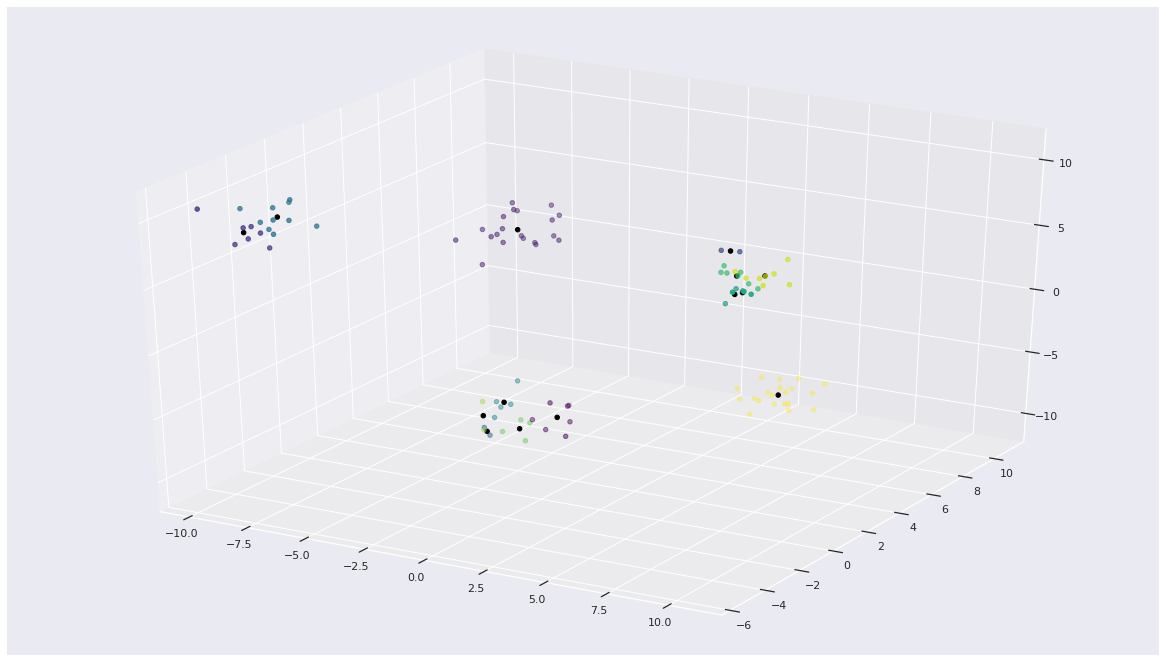

In [6]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    
    return centers, labels


for k in range(1, 15):

    centers, y_kmeans = find_clusters(X, k,rseed=0)
    fig =plt.figure()
    ax = Axes3D(fig)
    ax.scatter(v1,v2,v3,c=y_kmeans,cmap='viridis');
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', alpha=1);

Das beste Ergebnis bei 1-15 Cluster erscheint bei k = 5. 

In [7]:
# Nun die 5 Means bestimmen.
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
#print(centers) # From Scratch
print("-----------------")
print("Nachfolgend die 5 Means")
print("-----------------")
print(centroids) # From sci-kit learn

-----------------
Nachfolgend die 5 Means
-----------------
[[-2.40331671  2.14752865 -8.02378894]
 [ 6.47155208  2.70446035  5.19967608]
 [-8.53242046 -3.55401526  8.96857685]
 [-5.10691526  5.60179825  3.71956936]
 [ 3.66536804  8.91074968 -9.06579829]]


Nun die clustering vector ausgeben

In [8]:
def get_points(clusterlabel: int, data: np.ndarray) -> np.ndarray:
    index_list = new_data[new_data.Cluster == clusterlabel]["Nummer"]
    return data[index_list.values]

new_data = pd.DataFrame()
new_data["Nummer"] = data.index.values
new_data["Cluster"] = kmeans.labels_

for i in range(0, k):
    print("Cluster %d:\n" % (i+1), get_points(i, X), "\n\n")

new_data.style.hide_index()





Cluster 1:
 [[-3.40526552  2.28142739 -7.63117179]
 [-4.61692581  2.83368789 -7.96289974]
 [-3.07076859  1.47953458 -7.79850529]
 [-1.39236828  0.98984384 -8.77572229]
 [-0.97476618  2.97478707 -8.53008822]
 [-3.40786306  3.24854313 -6.19404276]
 [-1.36947289  2.1142807  -8.67632312]
 [-1.70617854  1.66601247 -7.9268549 ]
 [-2.34049748 -0.05101276 -7.26979297]
 [-3.79872596  2.55320535 -7.51800226]
 [-2.52701507  2.89903674 -8.80825287]
 [-2.57316647  1.2603038  -8.61121531]
 [-1.54920423  3.68675988 -7.89780973]
 [-2.71827605  0.74916694 -8.58455388]
 [-1.40993477  2.42873792 -6.75821297]
 [-2.85053053  2.11211451 -7.10981719]
 [-0.07713301  1.5195989  -8.37143096]
 [-2.71713552  2.49213997 -8.59667177]
 [-3.8855629   1.93229341 -9.39347086]
 [-1.67554326  3.78011122 -8.06093994]] 


Cluster 2:
 [[ 5.7082258   2.65857479  5.40448245]
 [ 6.37219562  4.45994039  4.36935755]
 [ 5.62156138  3.43105644  4.66657363]
 [ 4.94946903  3.57706667  5.14013488]
 [10.34469203 -2.64093438  8.6606614

Nummer,Cluster
0,3
1,2
2,2
3,1
4,2
5,4
6,1
7,2
8,0
9,1
